In [1]:
from preprocessing import data_loader
from model import CNN
from model_new import CNN2
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

c:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
import numpy as np
def new_dataset(batch_size=1, dire = "alex_embedding_set"):
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(0)

    train_loader, val_loader = data_loader(batch_size=batch_size, shuffle=False)
    id=0
    for batch in tqdm(train_loader):
        imgs, labels = batch.values()
        labels = torch.argmax(labels, dim=1)
        np.save(f"{dire}/embed_{id}", imgs.numpy())
        np.save(f"{dire}/label_{id}", labels.numpy())
        id += 1
    
    for batch in tqdm(val_loader):
        imgs, labels = batch.values()
        labels = torch.argmax(labels, dim=1)
        np.save(f"{dire}/embed_{id}", imgs.numpy())
        np.save(f"{dire}/label_{id}", labels.numpy())
        id += 1

In [13]:
new_dataset()

100%|██████████| 2520/2520 [00:33<00:00, 75.49it/s] 


In [3]:
from preprocessing import AlexEmbed
from torch.utils.data import DataLoader
alexembed = AlexEmbed()

In [4]:
train_size = int(0.8 * len(alexembed))
val_size = len(alexembed) - train_size
train_set, val_set = torch.utils.data.random_split(alexembed, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=256, shuffle=True)
val_loader = DataLoader(val_set, batch_size=1024, shuffle=True)

In [5]:
from train import train



Attempt 1: BS = 2

In [6]:
net = CNN2()
train_err, train_loss, val_err, val_loss = train(net, train_loader, val_loader)
#error_rate, wrong_guess_rate, guesses = performance_per_class(net)

cuda_enabled


  3%|▎         | 1/30 [00:53<25:55, 53.63s/it]

Epoch 0: Train err: 0.724436649659864 Val err: 0.5847505668934241 Train loss: 2.1993125855113584 Val loss: 1.8422937393188477


  7%|▋         | 2/30 [01:45<24:36, 52.74s/it]

Epoch 1: Train err: 0.6147959183673469 Val err: 0.5509495464852607 Train loss: 1.8959116374745089 Val loss: 1.717888593673706


 10%|█         | 3/30 [02:38<23:47, 52.85s/it]

Epoch 2: Train err: 0.5758219954648526 Val err: 0.5378401360544217 Train loss: 1.7862077066801252 Val loss: 1.677831266607557


 13%|█▎        | 4/30 [03:30<22:48, 52.62s/it]

Epoch 3: Train err: 0.5537485827664399 Val err: 0.5265022675736961 Train loss: 1.7208178032577308 Val loss: 1.6373706034251623


 17%|█▋        | 5/30 [04:24<22:03, 52.93s/it]

Epoch 4: Train err: 0.532844387755102 Val err: 0.5101332199546486 Train loss: 1.6607985091964583 Val loss: 1.5928359287125724


 20%|██        | 6/30 [05:16<21:02, 52.60s/it]

Epoch 5: Train err: 0.5188846371882087 Val err: 0.4987953514739229 Train loss: 1.6200513931421132 Val loss: 1.5737110887254988


 23%|██▎       | 7/30 [06:09<20:11, 52.66s/it]

Epoch 6: Train err: 0.5099737811791383 Val err: 0.4927721088435374 Train loss: 1.589181732268355 Val loss: 1.5642780320984977


 27%|██▋       | 8/30 [07:01<19:15, 52.51s/it]

Epoch 7: Train err: 0.49620890022675734 Val err: 0.4991496598639456 Train loss: 1.5460682724396029 Val loss: 1.5611700926508223


 30%|███       | 9/30 [07:54<18:25, 52.66s/it]

Epoch 8: Train err: 0.4867665816326531 Val err: 0.49000850340136054 Train loss: 1.5188713359617 Val loss: 1.5522563883236475


 33%|███▎      | 10/30 [08:47<17:33, 52.70s/it]

Epoch 9: Train err: 0.48040674603174605 Val err: 0.4880952380952381 Train loss: 1.5004665700558624 Val loss: 1.535874332700457


 37%|███▋      | 11/30 [09:39<16:36, 52.44s/it]

Epoch 10: Train err: 0.4715844671201814 Val err: 0.486890589569161 Train loss: 1.4664682991364424 Val loss: 1.5435661503246851


 40%|████      | 12/30 [10:31<15:42, 52.34s/it]

Epoch 11: Train err: 0.4686082766439909 Val err: 0.4792375283446712 Train loss: 1.457950966929958 Val loss: 1.5329727189881461


 43%|████▎     | 13/30 [11:23<14:49, 52.34s/it]

Epoch 12: Train err: 0.46269132653061223 Val err: 0.48235544217687076 Train loss: 1.4377897044652188 Val loss: 1.5266375882284982


 47%|████▋     | 14/30 [12:16<13:58, 52.40s/it]

Epoch 13: Train err: 0.45431193310657597 Val err: 0.47831632653061223 Train loss: 1.4114779293267437 Val loss: 1.5154755030359541


 50%|█████     | 15/30 [13:08<13:06, 52.41s/it]

Epoch 14: Train err: 0.45161918934240364 Val err: 0.48086734693877553 Train loss: 1.404104853647327 Val loss: 1.518745754446302


 53%|█████▎    | 16/30 [14:00<12:13, 52.38s/it]

Epoch 15: Train err: 0.44440901360544216 Val err: 0.4790958049886621 Train loss: 1.3848795518616206 Val loss: 1.508829755442483


 57%|█████▋    | 17/30 [14:52<11:19, 52.30s/it]

Epoch 16: Train err: 0.4421768707482993 Val err: 0.47307256235827666 Train loss: 1.3730242225379425 Val loss: 1.5075814723968506


 60%|██████    | 18/30 [15:46<10:31, 52.61s/it]

Epoch 17: Train err: 0.43654336734693877 Val err: 0.47052154195011336 Train loss: 1.3614984659048228 Val loss: 1.5036663583346777


 63%|██████▎   | 19/30 [16:39<09:40, 52.77s/it]

Epoch 18: Train err: 0.43300028344671204 Val err: 0.47505668934240364 Train loss: 1.350904458248777 Val loss: 1.5135754772594996


 67%|██████▋   | 20/30 [17:31<08:46, 52.69s/it]

Epoch 19: Train err: 0.4279513888888889 Val err: 0.4732142857142857 Train loss: 1.335527464814855 Val loss: 1.5088220494134086


 70%|███████   | 21/30 [18:24<07:54, 52.73s/it]

Epoch 20: Train err: 0.428358843537415 Val err: 0.4743480725623583 Train loss: 1.3363129272719854 Val loss: 1.5104073541504996


 73%|███████▎  | 22/30 [19:17<07:01, 52.72s/it]

Epoch 21: Train err: 0.424922052154195 Val err: 0.47413548752834467 Train loss: 1.3215572758497696 Val loss: 1.5084540929113115


 77%|███████▋  | 23/30 [20:10<06:10, 52.94s/it]

Epoch 22: Train err: 0.42077664399092973 Val err: 0.4700963718820862 Train loss: 1.3167481735281275 Val loss: 1.4953704476356506


 80%|████████  | 24/30 [21:05<05:20, 53.36s/it]

Epoch 23: Train err: 0.4195365646258503 Val err: 0.47484410430839 Train loss: 1.3032251779849713 Val loss: 1.5151687179292952


 83%|████████▎ | 25/30 [22:03<04:34, 54.98s/it]

Epoch 24: Train err: 0.4169855442176871 Val err: 0.47484410430839 Train loss: 1.2978821221519918 Val loss: 1.530659054006849


 87%|████████▋ | 26/30 [22:59<03:40, 55.04s/it]

Epoch 25: Train err: 0.41578089569161 Val err: 0.46931689342403626 Train loss: 1.2908876886195186 Val loss: 1.5096235360418047


 90%|█████████ | 27/30 [23:53<02:44, 54.72s/it]

Epoch 26: Train err: 0.41028911564625853 Val err: 0.4689625850340136 Train loss: 1.281341185936561 Val loss: 1.5015062178884233


 93%|█████████▎| 28/30 [24:48<01:49, 54.92s/it]

Epoch 27: Train err: 0.4102359693877551 Val err: 0.47534013605442177 Train loss: 1.2818234355201548 Val loss: 1.5254477943692888


 97%|█████████▋| 29/30 [25:45<00:55, 55.41s/it]

Epoch 28: Train err: 0.40855300453514737 Val err: 0.46662414965986393 Train loss: 1.2706751478203822 Val loss: 1.5141239677156721


100%|██████████| 30/30 [26:40<00:00, 53.35s/it]

Epoch 29: Train err: 0.40835813492063494 Val err: 0.4685374149659864 Train loss: 1.2735796697538901 Val loss: 1.511656871863774


(30,)


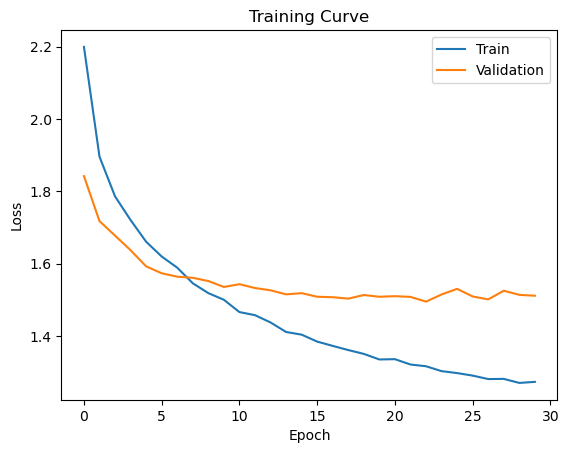

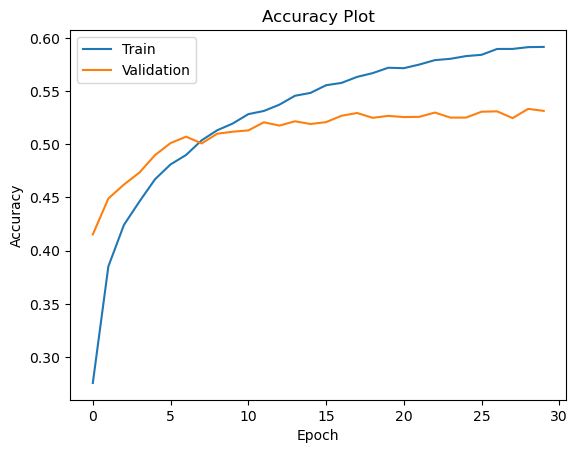

In [13]:
epoch_size = 30
epochs = np.linspace(0, 29, num=30)
train_acc = np.full(30, 1) - train_err
val_acc = np.full(30, 1) - val_err

print(train_acc.shape)

plt.title("Training Curve")
plt.plot(train_loss, label="Train")
plt.plot(val_loss, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("Accuracy Plot")
plt.plot(epochs, train_acc, label="Train")
plt.plot(epochs, val_acc, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

In [7]:
from train import performance_per_class

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda:0


In [8]:
error_rate, wrong_guess_rate, guesses = performance_per_class(CNN2())
print("The error rate is:"+ str(error_rate))
print(wrong_guess_rate)
print(guesses)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_addmm)

In [ ]:
net = CNN2()
train_err, train_loss, val_err, val_loss = train(net, train_loader, val_loader)


In [8]:
dataloader = DataLoader(alexembed, batch_size=64, shuffle=True)
for sample_batched in dataloader:
    print(sample_batched['image'].shape)
    print(sample_batched['label'].shape)
    break

torch.Size([64, 1, 256, 6, 6])
torch.Size([64, 1, 256, 6, 6])
